<a href="https://colab.research.google.com/github/Elsamariatomlin/elsa/blob/main/deeplearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0

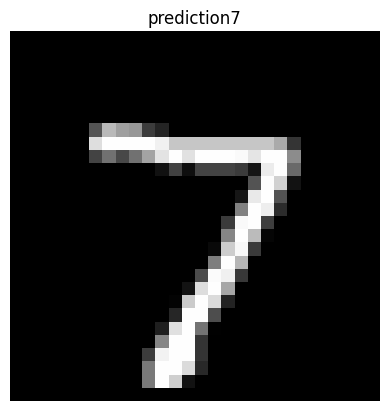

In [14]:
import tensorflow as tf
from tensorflow.keras  import layers,models
import matplotlib.pyplot as plt


(X_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
X_train=X_train.astype('float32')/255
x_test=x_test.astype('float32')/255
print((X_train,y_train),(x_test,y_test))
X_train=X_train.reshape(-1,28,28,1)#1 is the number opf channels
x_test=x_test.reshape(-1,28,28,1)#-1 means "figure this dimension out automatically"


#Buuld a simple chh model
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),#convolutional layer
    layers.MaxPooling2D((2,2)),#pooling layer
    layers.Flatten(),#flatten into 2D
    layers.Dense(64,activation="relu"),#fully connected layer
    layers.Dense(10,activation='softmax')#output layer(10 classes)
])
#6 compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#7 train model
history=model.fit(
    X_train,y_train,
    epochs=5,#faster traing
    validation_data=(x_test,y_test),
    verbose=1 #shows progress bar
)
#8 evaluate model
test_loss,test_acc=model.evaluate(x_test,y_test, verbose=0)
print(f"test accuracy:",round(test_acc*100,2),"%")

#9 prediction example
predictions=model.predict(x_test[:1])
prediction_label=predictions.argmax()

plt.imshow(x_test[0],cmap='gray')
plt.title("prediction"+str(prediction_label))
plt.axis('off')
plt.show()